<a href="https://colab.research.google.com/github/LeDinhHung2211/AI_NeuralNmetwork/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#import library
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import dropout

In [5]:
(X_train, y_train),(X_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
#x_test,x_train là mảng 3 chiều để chuyển về 2 chiều ta lấy 28x28
X_train = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(-1,X_test.shape[1]*X_test.shape[2])

In [8]:
#chuẩn hóa 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255
X_test /=255

In [9]:
#chuyển y thành 10 class
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [10]:
# Tạo model ANN
model = Sequential()
model.add(Dense(500,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [11]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,batch_size=128,epochs=30,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=70)])


Epoch 1/30
375/375 [==============================] - 6s 15ms/step - loss: 0.6554 - accuracy: 0.7653 - val_loss: 0.4692 - val_accuracy: 0.8331
Epoch 2/30
375/375 [==============================] - 5s 14ms/step - loss: 0.4440 - accuracy: 0.8376 - val_loss: 0.4747 - val_accuracy: 0.8306
Epoch 3/30
375/375 [==============================] - 5s 14ms/step - loss: 0.4004 - accuracy: 0.8549 - val_loss: 0.3687 - val_accuracy: 0.8681
Epoch 4/30
375/375 [==============================] - 5s 14ms/step - loss: 0.3742 - accuracy: 0.8655 - val_loss: 0.3576 - val_accuracy: 0.8703
Epoch 5/30
375/375 [==============================] - 5s 14ms/step - loss: 0.3551 - accuracy: 0.8722 - val_loss: 0.3673 - val_accuracy: 0.8690
Epoch 6/30
375/375 [==============================] - 5s 14ms/step - loss: 0.3460 - accuracy: 0.8765 - val_loss: 0.3437 - val_accuracy: 0.8791
Epoch 7/30
375/375 [==============================] - 5s 14ms/step - loss: 0.3331 - accuracy: 0.8808 - val_loss: 0.3341 - val_accuracy: 0.8823

In [13]:
#in sai so và độ chính xác
score = model.evaluate(X_test,y_test,verbose=0)
print('Sai số  ',score[0])
print('Độ chính xác  ',score[1])

Sai số   0.4818847179412842
Độ chính xác   0.8863999843597412


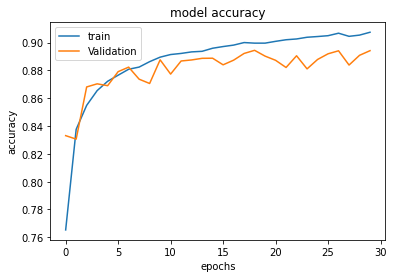

In [14]:
#Quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()